# Exploritary Data Analysis for the candidates dataset
only the candidates which have some jobs matches

## Import libraries

In [1]:
import re
import json
import pymorphy3
import tokenize_uk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Load data

In [2]:
df = pd.read_csv('../../data/prepared_candidates/candidates_prepared.csv')
df.head()

,Position,Moreinfo,Looking For,Highlights,Primary Keyword,English Level,Experience Years,CV,CV_lang,id
0,1c,"Розробник 1с/BAS, всі українські конфігурації,...",NaN,NaN,Other,intermediate,11.0,"\nРозробник 1с/BAS, всі українські конфігураці...",uk,dcaeffc4-1d1f-5754-a567-f478f0c8aa6f
1,1c developer,Еко - маркет Торгівля роздрібна 1 рік 9 місяці...,NaN,Hillel IT school Java Basic and Java Pro 2022\...,SQL,pre,11.0,Hillel IT school Java Basic and Java Pro 2022\...,uk,2767ca2d-4bca-5b41-b9e0-e42ad5700b6f
2,1C developer (purpose: switch to Golang/Ruby),Займаюся автоматизацією підприємств вже понад ...,"Найголовніше - це атмосфера в колективі, також...","Самостійно приймати рішення, брати відповідаль...",Ruby,upper,7.0,"Самостійно приймати рішення, брати відповідаль...",uk,ff07df1f-5268-5865-8f30-1cc660786494
3,1C програміст,Шукаю роботу з метою розвитку та вдосконалення...,В першу чергу мене цікавить можливість розвитк...,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",SQL,intermediate,0.5,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",uk,da4b79b1-fbc5-5dfe-bba0-58339f262d11
4,1C програміст,Шукаю роботу по напрямку junior С++. Маю досві...,"Цікаві проекти, саморозвиток.",NaN,Data Engineer,intermediate,6.0,\nШукаю роботу по напрямку junior С++. Маю дос...,uk,b118a952-cbe6-58ac-824a-10de5322570c


In [3]:
unique_candidates = list(json.load(open('../../data/final_groups/groups.json')).keys())
print("Unique candidates count:",len(unique_candidates))

Unique candidates count: 130312


In [4]:
df = df[df['id'].isin(unique_candidates)].reset_index(drop=True)
print("Candidates count after filtering:",len(df['id'].unique()))
df.head()

Candidates count after filtering: 130312


,Position,Moreinfo,Looking For,Highlights,Primary Keyword,English Level,Experience Years,CV,CV_lang,id
0,1C програміст,Шукаю роботу з метою розвитку та вдосконалення...,В першу чергу мене цікавить можливість розвитк...,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",SQL,intermediate,0.5,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",uk,da4b79b1-fbc5-5dfe-bba0-58339f262d11
1,1С Developer,02/21 - today - Online Retail\r\n- модернізаці...,NaN,NaN,SQL,intermediate,5.0,\n02/21 - today - Online Retail\r\n- модерніза...,uk,0e73f394-07ea-5bed-b912-0bfaeba4a1fe
2,1С програміст,Програміст з досвідом роботи понад 5 років.\r\...,NaN,"Ряд успішних впроваджень: \r\nТзОВ "" Хан Ектро...",Other,basic,3.0,"Ряд успішних впроваджень: \r\nТзОВ "" Хан Ектро...",uk,4d64d70c-50f3-52de-9ad8-4d066e943465
3,1С розробник,Підтримка користувачів і оновлення бази 1С. Ро...,NaN,NaN,Other,intermediate,2.0,\nПідтримка користувачів і оновлення бази 1С. ...,uk,4d81582f-7d41-52dc-bcc0-732ce4114ba6
4,2D/3D Artist,"Привіт! Я Діана, моя суперсила маневрувати мі...",NaN,"Мої обов'язки:\r\n- створення ігрових іконок,\...",Artist,basic,1.0,"Мої обов'язки:\r\n- створення ігрових іконок,\...",uk,44e5fb2c-9c60-5cb4-973a-9a39eadd71a5


## General dataset statistics

In [5]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130312 entries, 0 to 130311
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Position          130312 non-null  object 
 1   Moreinfo          130312 non-null  object 
 2   Looking For       57252 non-null   object 
 3   Highlights        61625 non-null   object 
 4   Primary Keyword   130299 non-null  object 
 5   English Level     130098 non-null  object 
 6   Experience Years  130312 non-null  float64
 7   CV                130312 non-null  object 
 8   CV_lang           130312 non-null  object 
 9   id                130312 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.9+ MB


In [6]:
# unique values counts for each column
for col in df.columns:
    print(col,'\t', len(df[col].unique()))

Position 	 4366
Moreinfo 	 130243
Looking For 	 55770
Highlights 	 61373
Primary Keyword 	 42
English Level 	 8
Experience Years 	 9
CV 	 130312
CV_lang 	 2
id 	 130312


In [7]:
# general statistics
df.describe()

,Experience Years
count,130312.000000
mean,2.021721
std,1.598245
min,0.000000
25%,0.500000
50%,2.000000
75%,3.000000
max,5.000000


## Additional function

In [8]:
def hist_with_stat_line(df, col, title):
    df[col].str.len().plot(kind= 'hist',bins=100, figsize=(15,5), color='green', alpha=0.5, title=title)
    plt.axvline(df[col].str.len().median(), color='red', linestyle='dashed', linewidth=1, label='median')
    plt.axvline(df[col].str.len().quantile(0.25), color='black', linestyle='dashed', linewidth=1, label='25%')
    plt.axvline(df[col].str.len().quantile(0.75), color='black', linestyle='dashed', linewidth=1, label='75%')
    plt.axvline(df[col].str.len().mean(), color='blue', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    plt.show()

## Statistics and plots for each column

### Position column
`manual written position titles`

In [9]:
# min, max, mean, median, 25%, 50%, 75% for length of Position column
df['Position'].str.len().describe()

count    130312.000000
mean         17.355439
std           5.059205
min           2.000000
25%          14.000000
50%          17.000000
75%          20.000000
max          49.000000
Name: Position, dtype: float64

<Axes: title={'center': 'Top 20 most popular positions'}, xlabel='Position'>

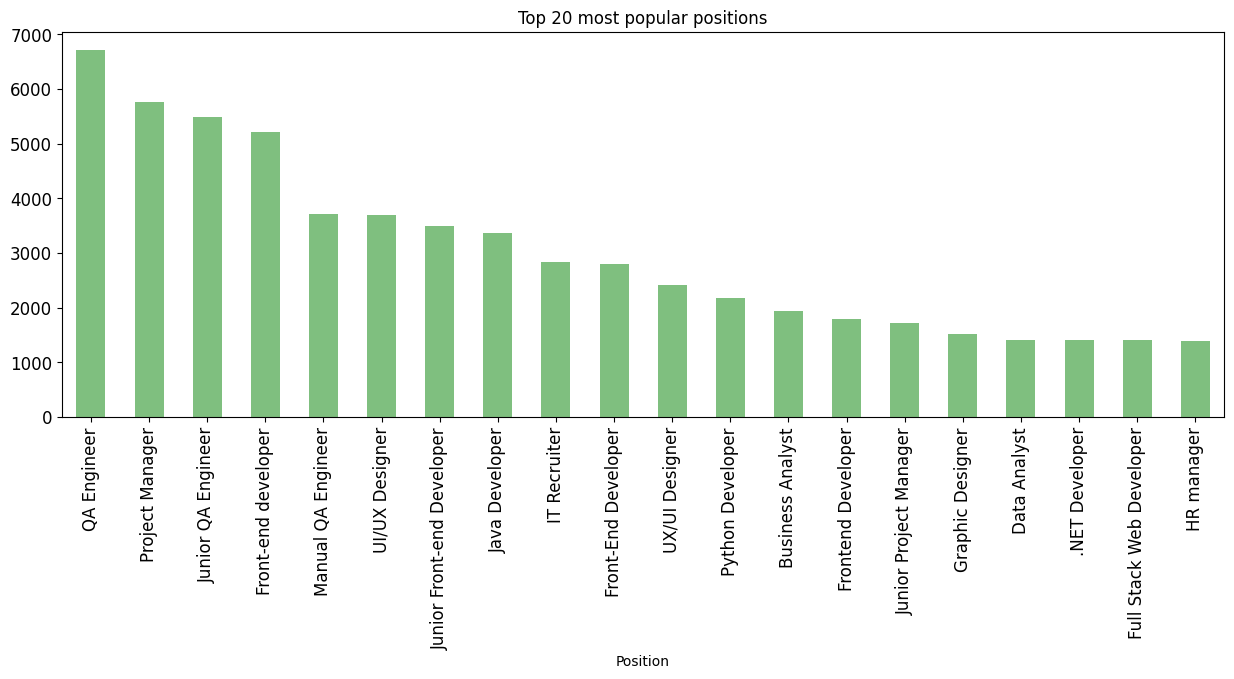

In [10]:
# top 20 most popular positions as a bar chart
df['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions', 
                                        fontsize=12, color='green', alpha=0.5)


In [11]:
# tail 20 positions
df['Position'].value_counts()[-20:]

Position
Manual QA Engineer (middle)                    1
Automation QA Engineer (SDET)                  1
Machine learning engineer / Data Scientist     1
Machine Learning Engineer (Computer Vision)    1
Linux Sysadmin                                 1
Linkbuilder/Outreach Specialist                1
Linux Developer                                1
Linux Engineer                                 1
Linux Kernel Developer                         1
Linux Kernel Engineer                          1
Linux Support Engineer                         1
Automation QA Trainee                          1
Automation QA (Java)                           1
Linux System Administrator/DevOps              1
Localization Engineer                          1
Low Code Developer                             1
Machine Learning developer                     1
Automation QA Python                           1
Machine learning Engineer                      1
1C програміст                                  1
Name: count

we can see that the most common position and some of the rarest positions can be really similar due to manual writing of the position titles.

<Axes: title={'center': 'Top 20 most popular positions. English language'}, xlabel='Position'>

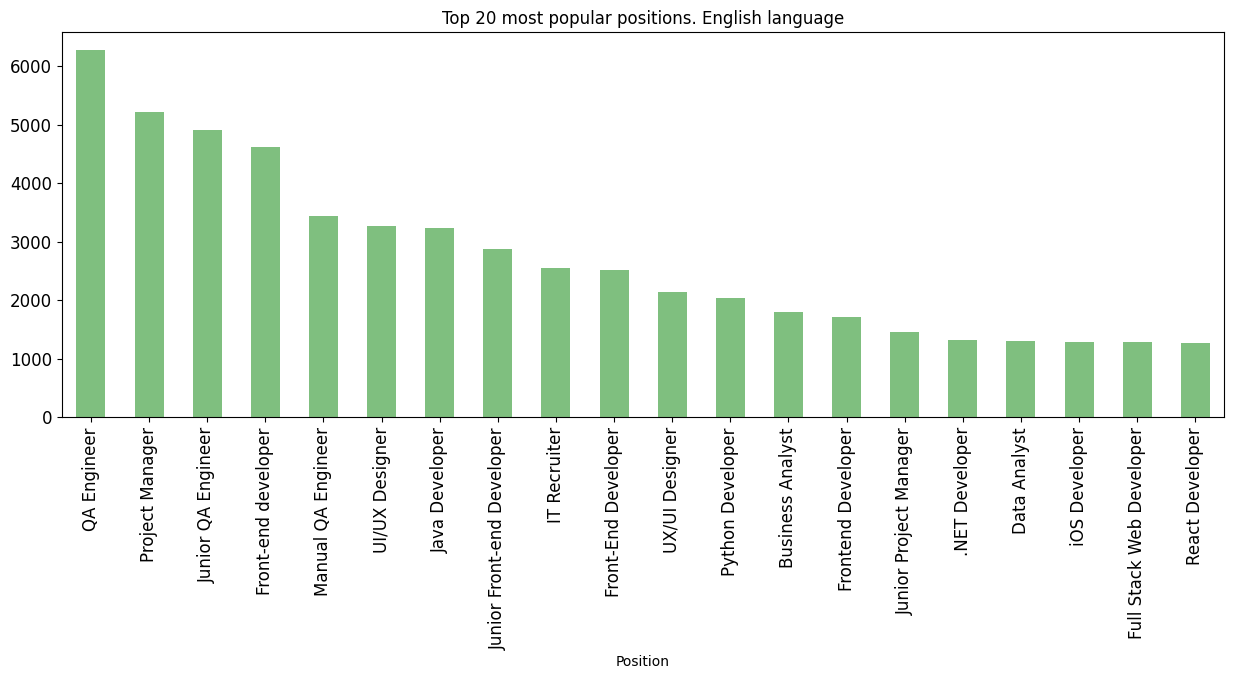

In [12]:
# top 20 most popular positions as a bar chart and show count of each position. English version
df[df['CV_lang']=='en']['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions. English language', 
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular positions. Ukrainian language'}, xlabel='Position'>

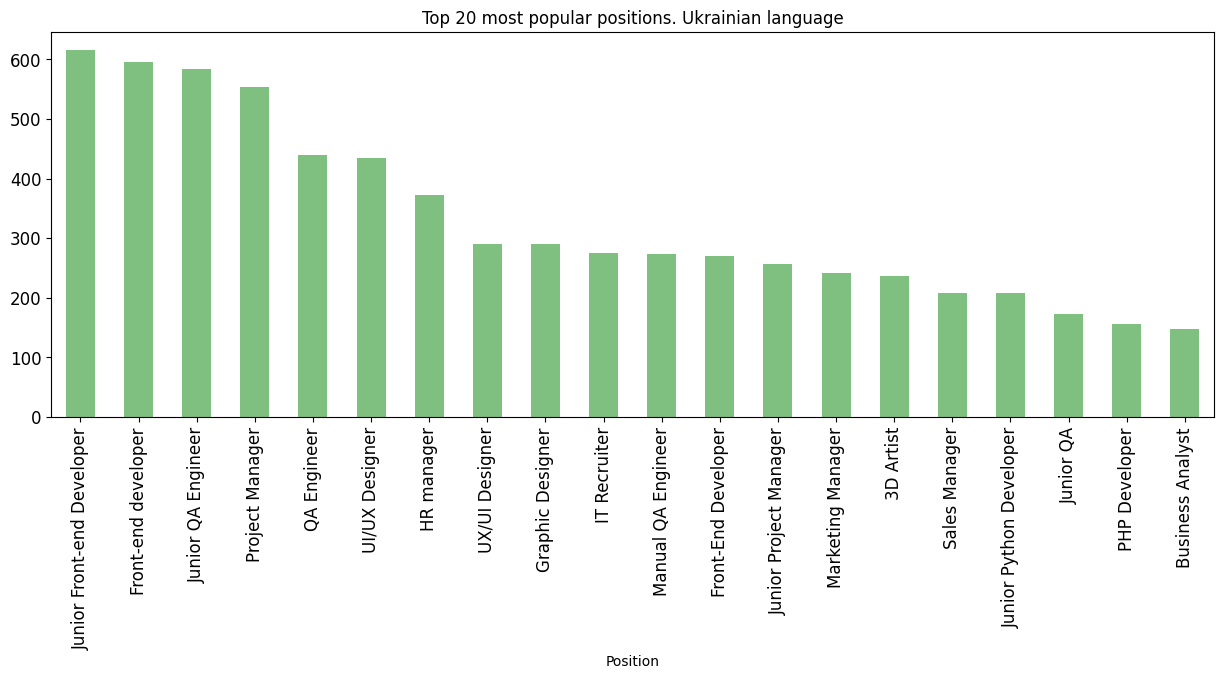

In [13]:
# top 20 most popular positions as a bar chart and show count of each position. English version
df[df['CV_lang']=='uk']['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions. Ukrainian language', 
                                        fontsize=12, color='green', alpha=0.5)

### Moreinfo column
`manual candidate's info`

In [14]:
# Moreinfo column length statistics
df['Moreinfo'].str.len().describe()

count    130312.000000
mean        657.976272
std         502.220957
min           1.000000
25%         302.000000
50%         501.000000
75%         850.000000
max        2600.000000
Name: Moreinfo, dtype: float64

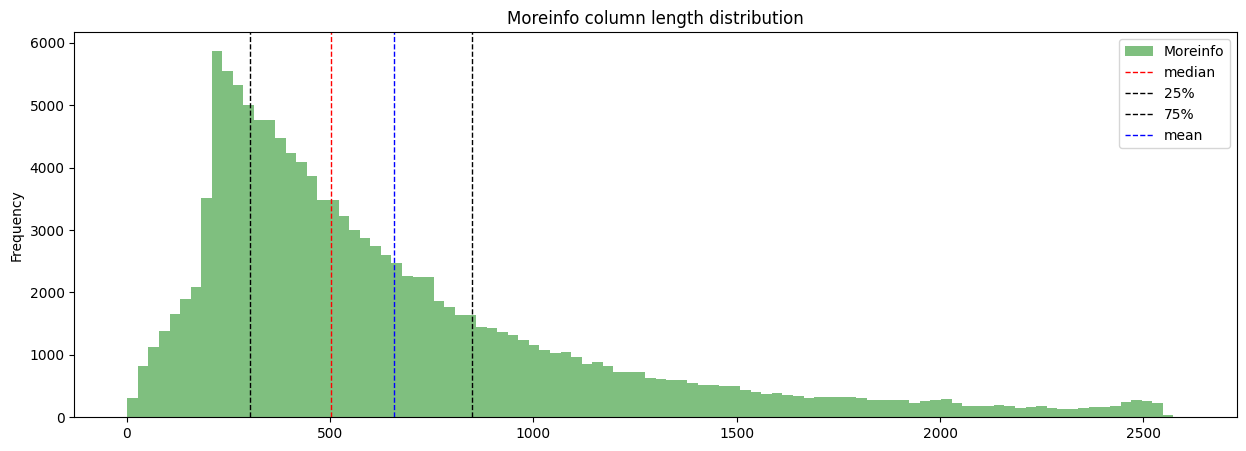

In [15]:
# distribution of Moreinfo column length
hist_with_stat_line(df, 'Moreinfo', 'Moreinfo column length distribution')

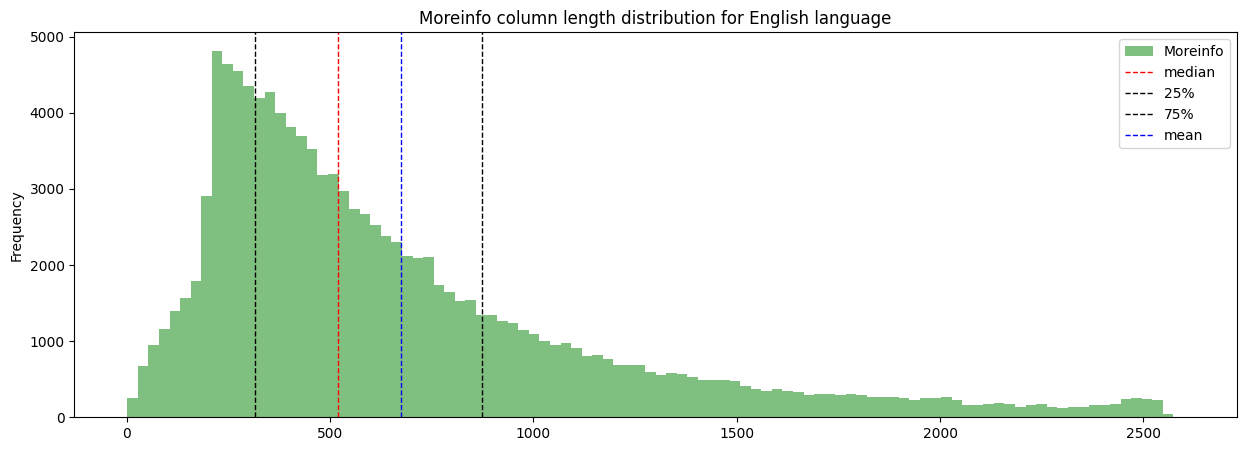

In [16]:
# distribution of Moreinfo column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Moreinfo', 'Moreinfo column length distribution for English language')

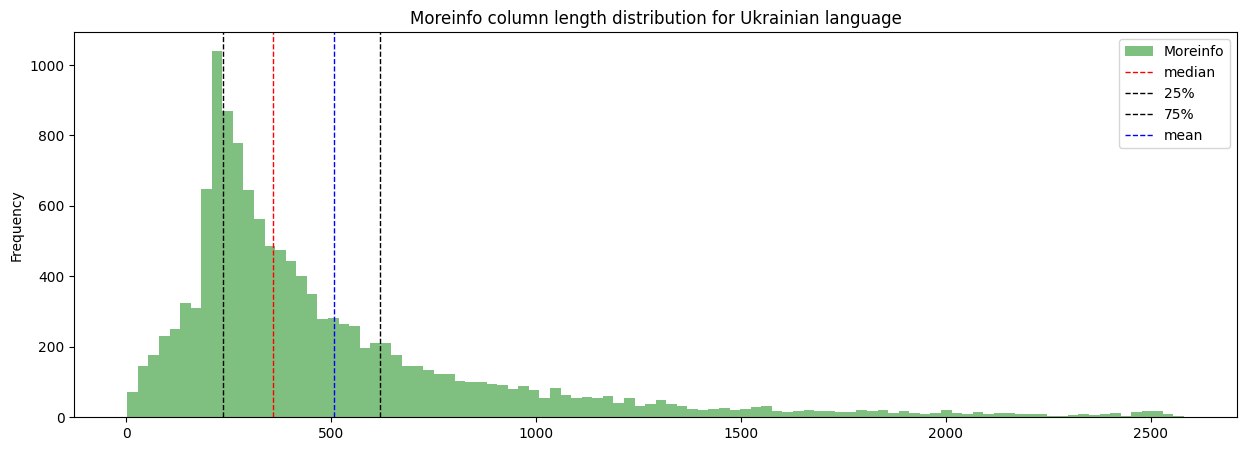

In [17]:
# distribution of Moreinfo column length for English language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Moreinfo', 'Moreinfo column length distribution for Ukrainian language')

### Looking For column
`manual written what people search`

In [18]:
# Looking For column length statistics
df['Looking For'].str.len().describe()

count    57252.00000
mean       160.10328
std        157.41510
min          1.00000
25%         68.00000
50%        117.00000
75%        199.00000
max       2489.00000
Name: Looking For, dtype: float64

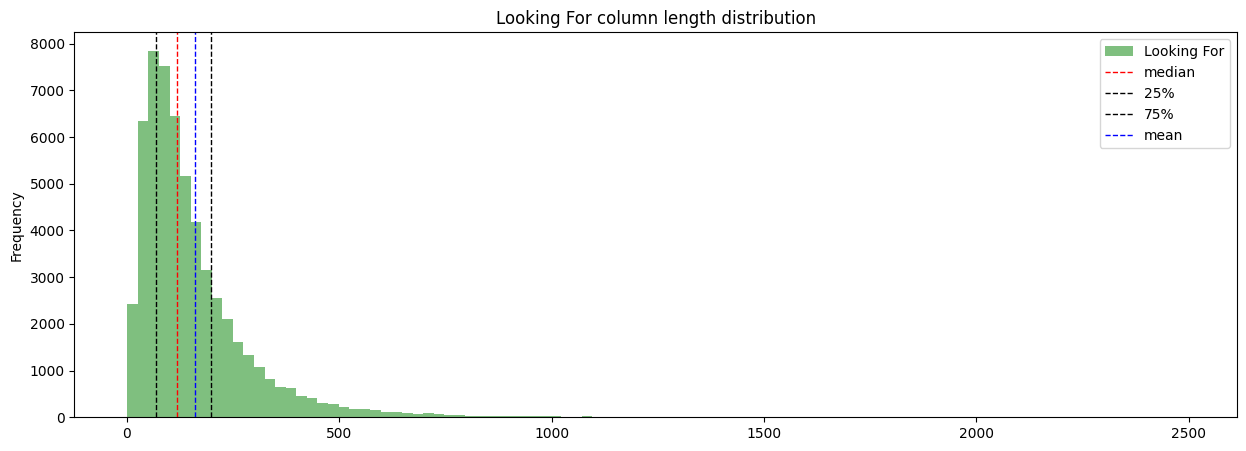

In [19]:
# distribution of Looking For column length
hist_with_stat_line(df, 'Looking For', 'Looking For column length distribution')

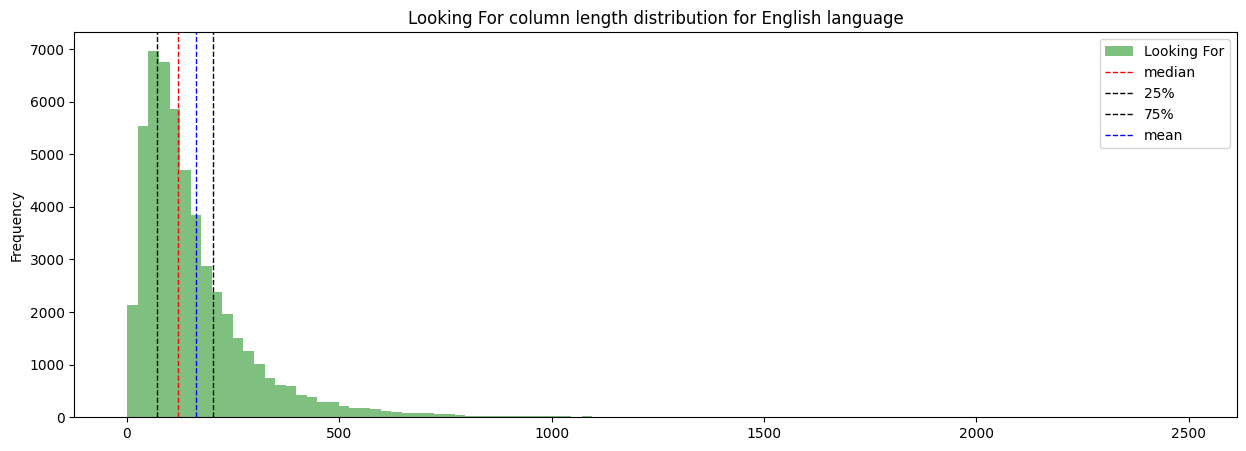

In [20]:
# distribution of Looking For column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Looking For', 'Looking For column length distribution for English language')

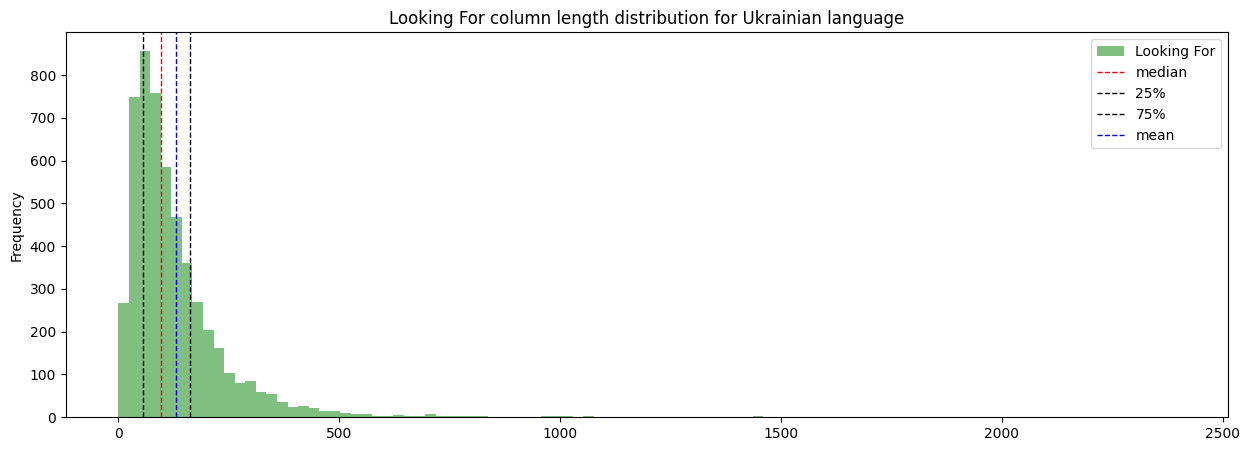

In [21]:
# distribution of Looking For column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Looking For', 'Looking For column length distribution for Ukrainian language')

### Highlights column
`manual written candidate's highlights`

In [22]:
# Highlights column length statistics
df['Highlights'].str.len().describe()

count    61625.000000
mean       287.446394
std        282.017978
min          1.000000
25%        112.000000
50%        204.000000
75%        361.000000
max       2500.000000
Name: Highlights, dtype: float64

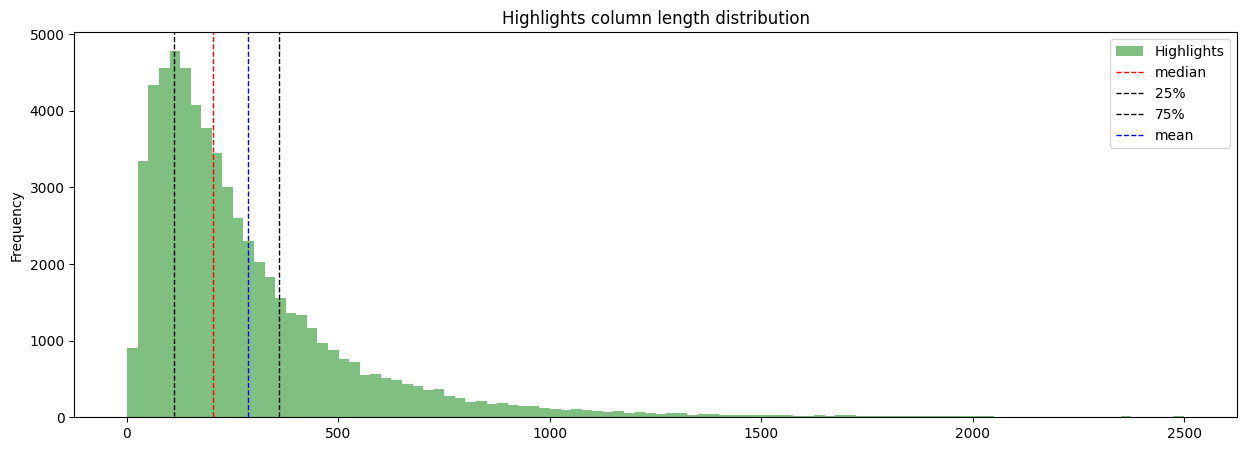

In [23]:
# distribution of Highlights column length
hist_with_stat_line(df, 'Highlights', 'Highlights column length distribution')

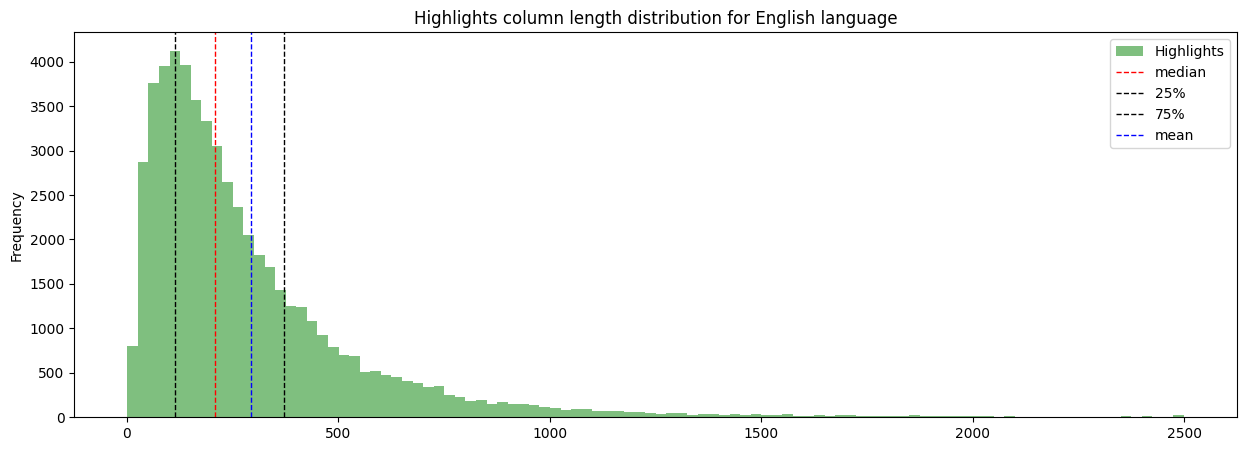

In [24]:
# distribution of Highlights column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Highlights', 'Highlights column length distribution for English language')

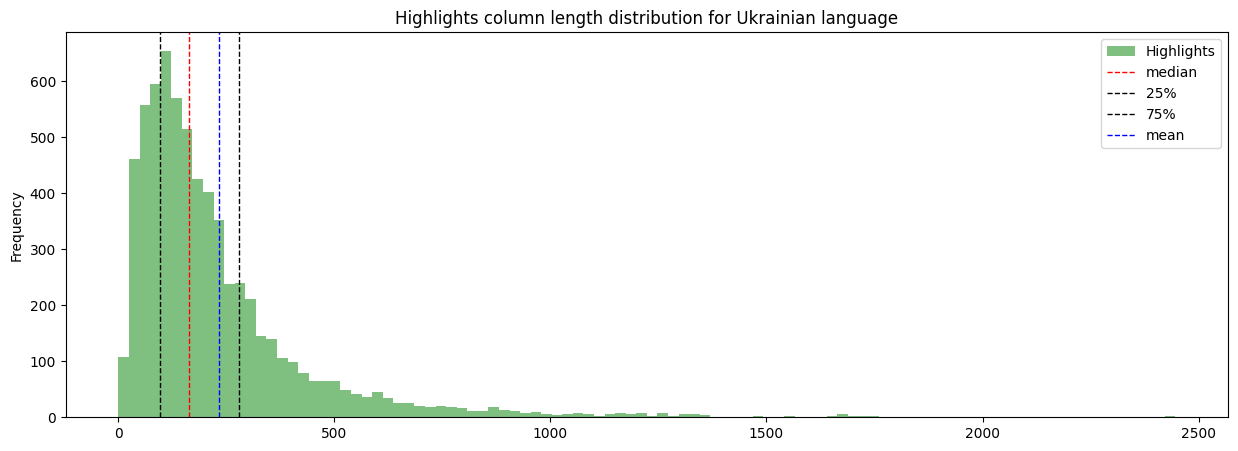

In [25]:
# distribution of Highlights column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Highlights', 'Highlights column length distribution for Ukrainian language')

## Primary Keyword column
`job profile type`

In [26]:
# unique Primary Keyword count
print("Unique Primary Keyword count:",len(df['Primary Keyword'].unique()))

Unique Primary Keyword count: 42


<Axes: title={'center': 'Top 20 most popular Primary Keywords'}, xlabel='Primary Keyword'>

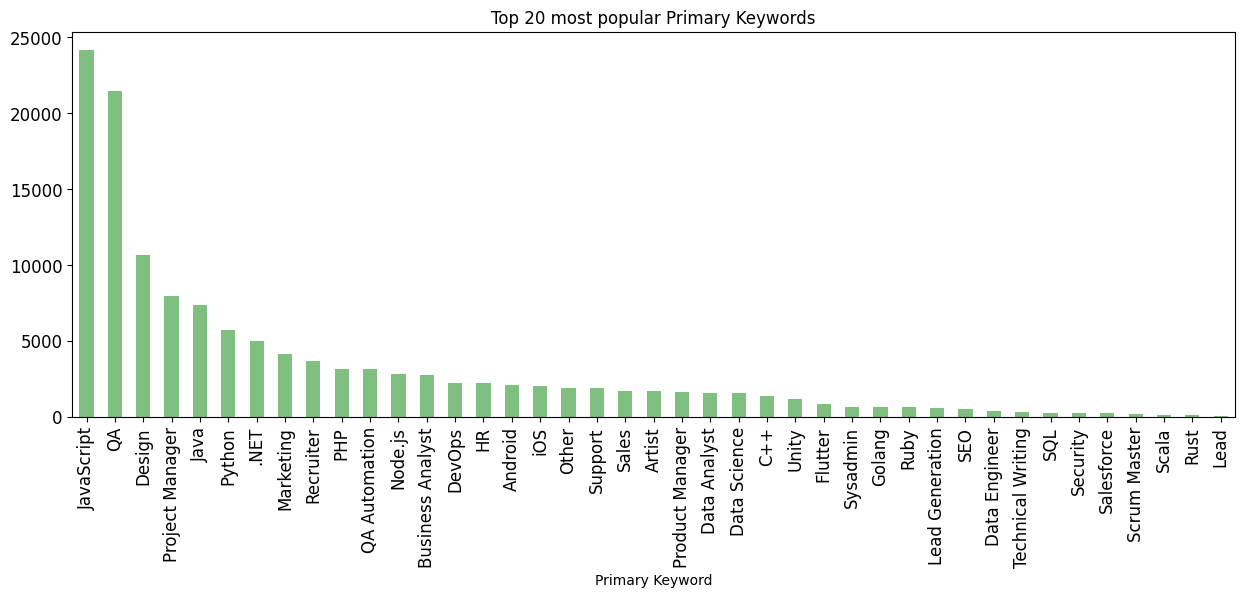

In [27]:
# primary keyword bar chart
df['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular Primary Keywords. English language'}, xlabel='Primary Keyword'>

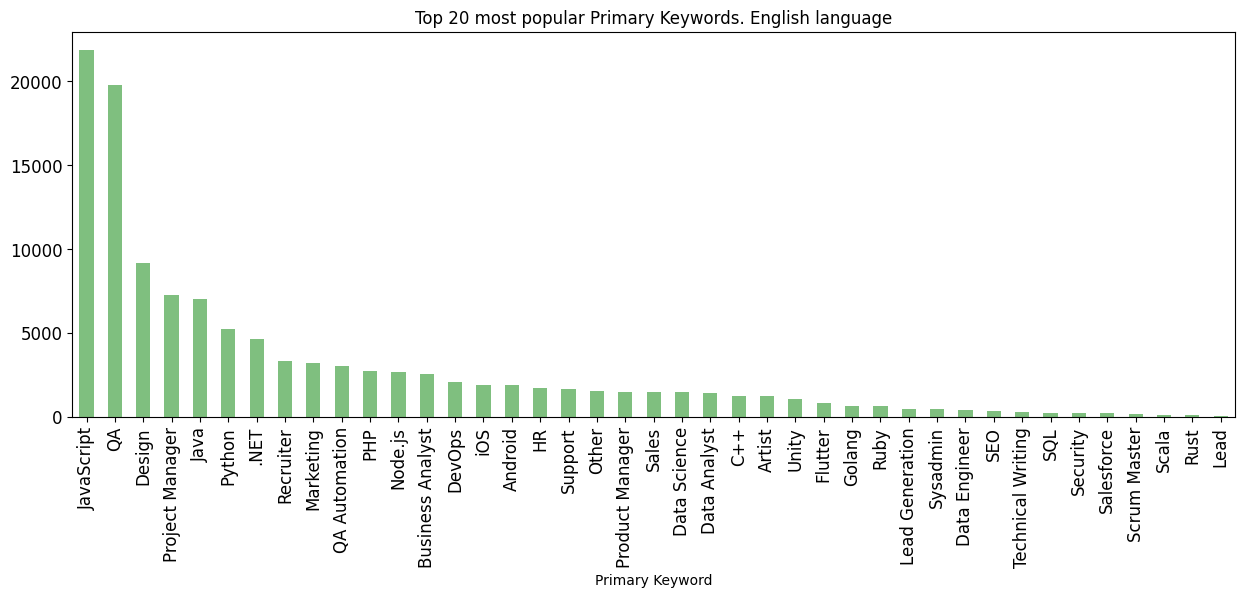

In [28]:
# primary keyword bar chart for English language
df[df['CV_lang']=='en']['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords. English language',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular Primary Keywords. Ukrainian language'}, xlabel='Primary Keyword'>

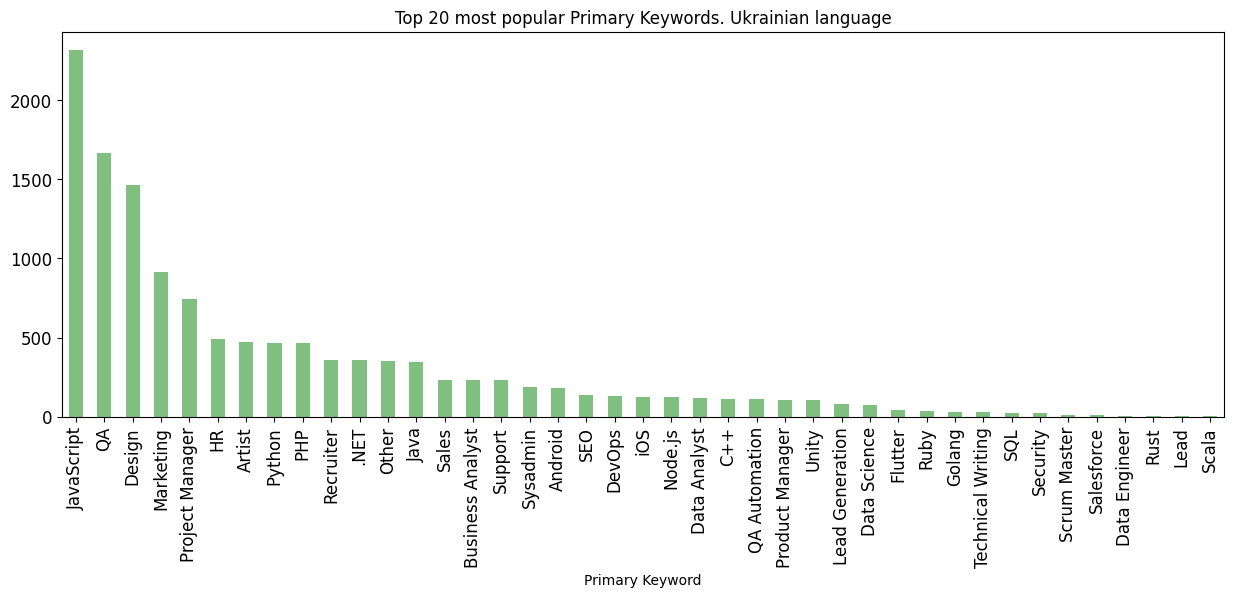

In [29]:
# primary keyword bar chart for Ukrainian language
df[df['CV_lang']=='uk']['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords. Ukrainian language',
                                            fontsize=12, color='green', alpha=0.5)

### English Level column
`candidate's english level`

In [30]:
# unique English Level count
print("Unique English Level count:",len(df['English Level'].unique()))

Unique English Level count: 8


<Axes: title={'center': 'English Level count'}, xlabel='English Level'>

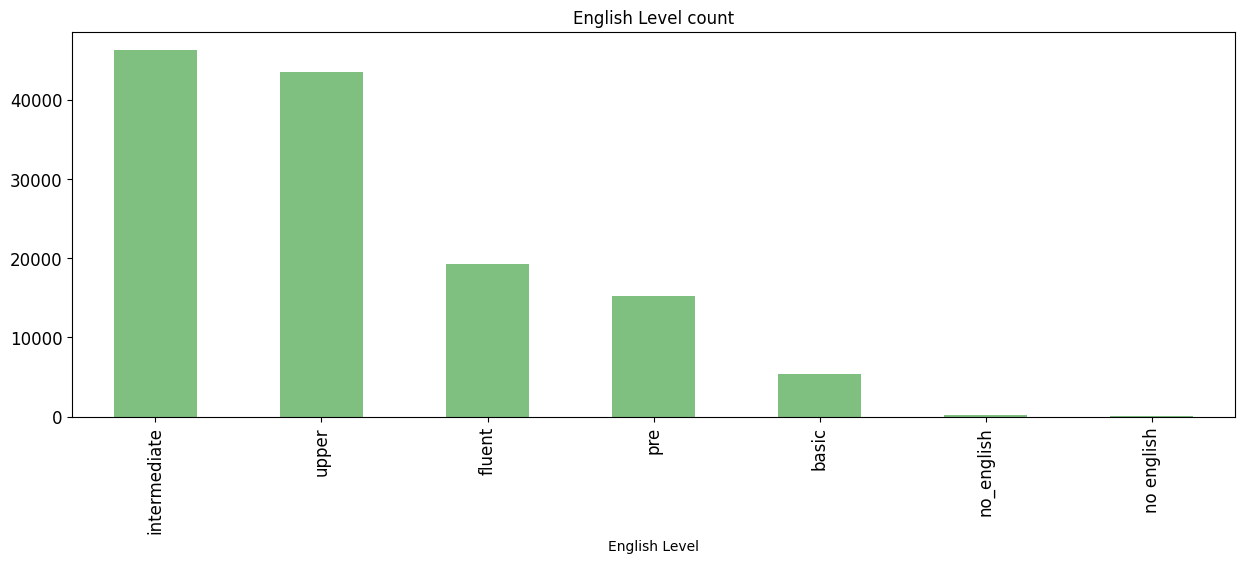

In [31]:
# English Level bar chart
df['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count',
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'English Level count. English language'}, xlabel='English Level'>

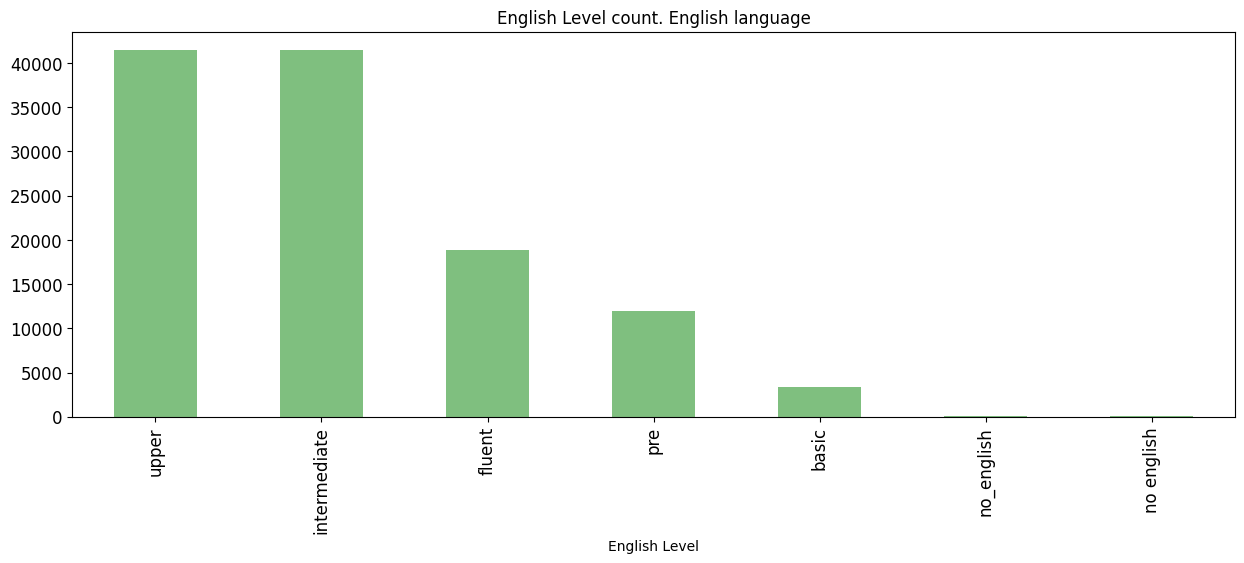

In [32]:
# English Level bar chart for English language
df[df['CV_lang']=='en']['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count. English language',
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'English Level count. Ukrainian language'}, xlabel='English Level'>

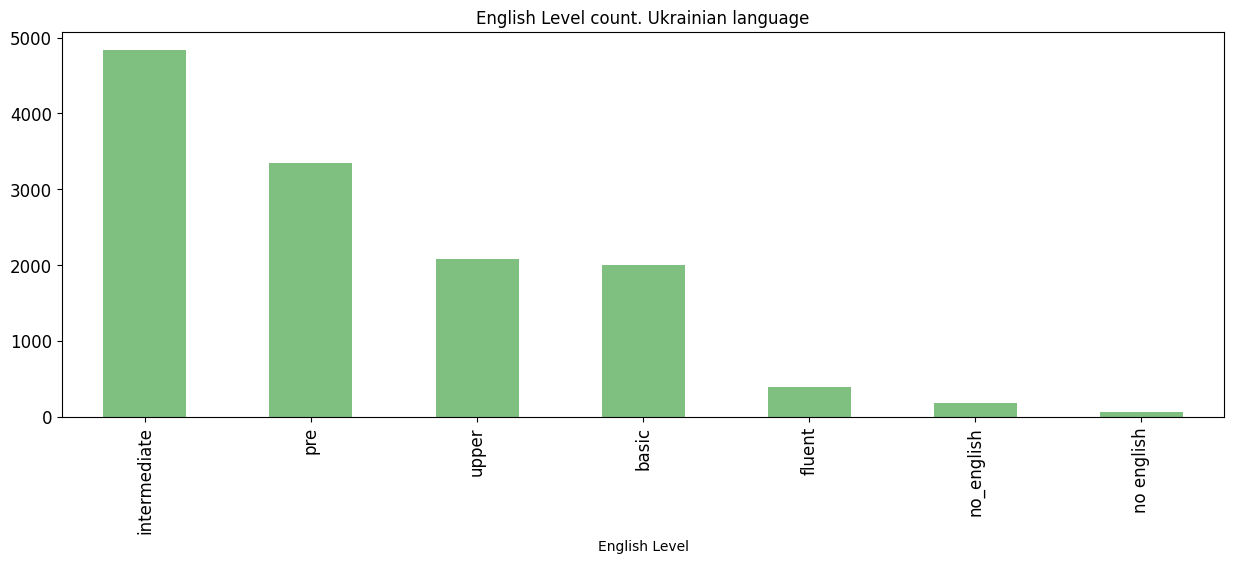

In [33]:
# English Level bar chart for Ukrainian language
df[df['CV_lang']=='uk']['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count. Ukrainian language',
                                        fontsize=12, color='green', alpha=0.5)

### Experience Years column
`candidate's experience years`

In [34]:
# general statistics for Experience Years column
df['Experience Years'].describe()

count    130312.000000
mean          2.021721
std           1.598245
min           0.000000
25%           0.500000
50%           2.000000
75%           3.000000
max           5.000000
Name: Experience Years, dtype: float64

<Axes: title={'center': 'Experience Years count'}, xlabel='Experience Years'>

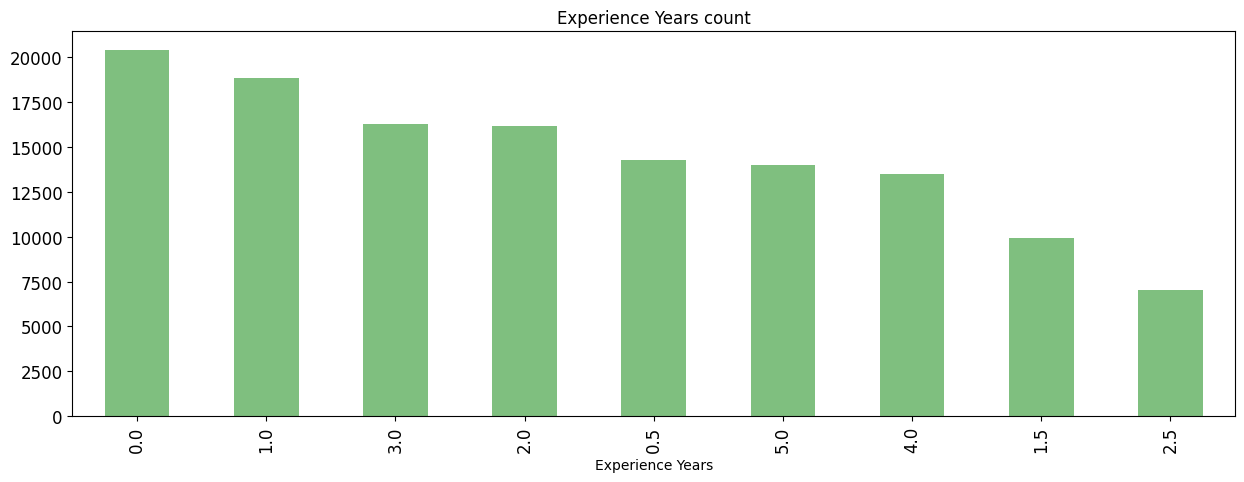

In [35]:
# bar chart for Experience Years column
df['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Experience Years count. English language'}, xlabel='Experience Years'>

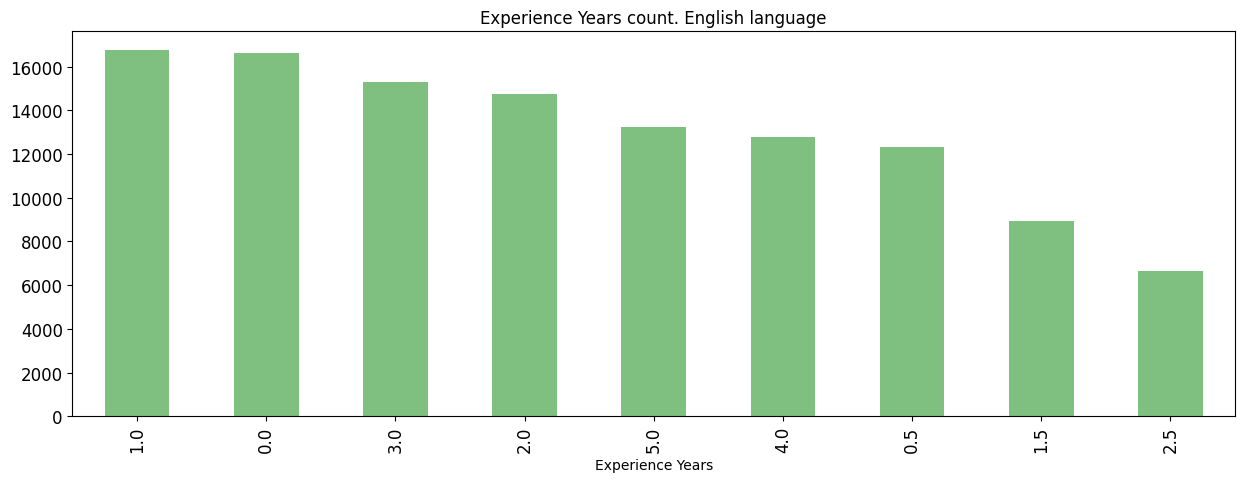

In [36]:
# bar chart for Experience Years column for English language
df[df['CV_lang']=='en']['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count. English language',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Experience Years count. Ukrainian language'}, xlabel='Experience Years'>

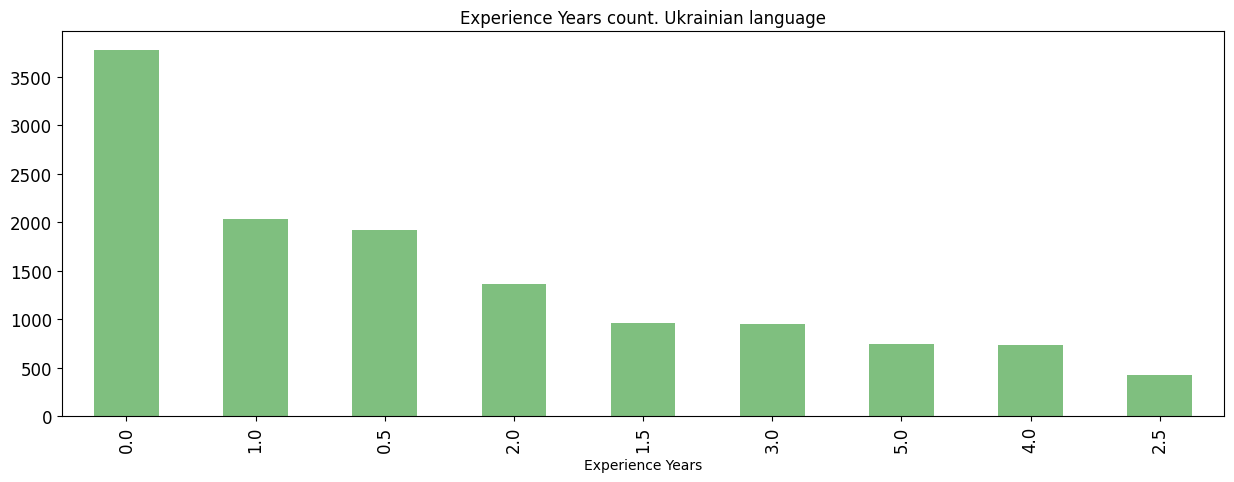

In [37]:
# bar chart for Experience Years column for Ukrainian language
df[df['CV_lang']=='uk']['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count. Ukrainian language',
                                            fontsize=12, color='green', alpha=0.5)

### CV column
`syntetic created column from: Highlights + Moreinfo + Looking For columns`

In [38]:
# CV column length statistics
df['CV'].str.len().describe()

count    130312.000000
mean        866.251343
std         623.704569
min           7.000000
25%         422.000000
50%         684.000000
75%        1119.000000
max        7372.000000
Name: CV, dtype: float64

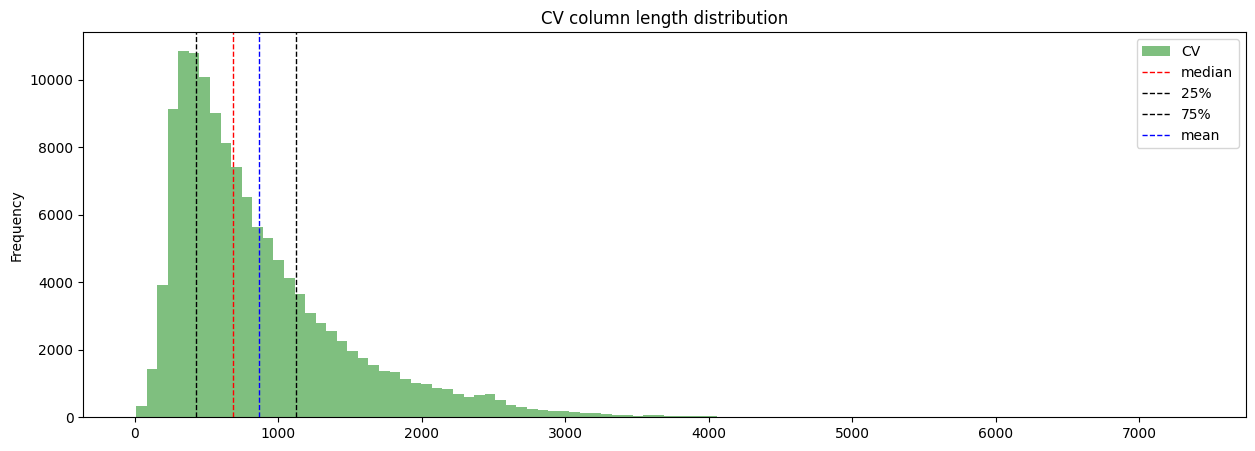

In [39]:
# distribution of CV column length
hist_with_stat_line(df, 'CV', 'CV column length distribution')

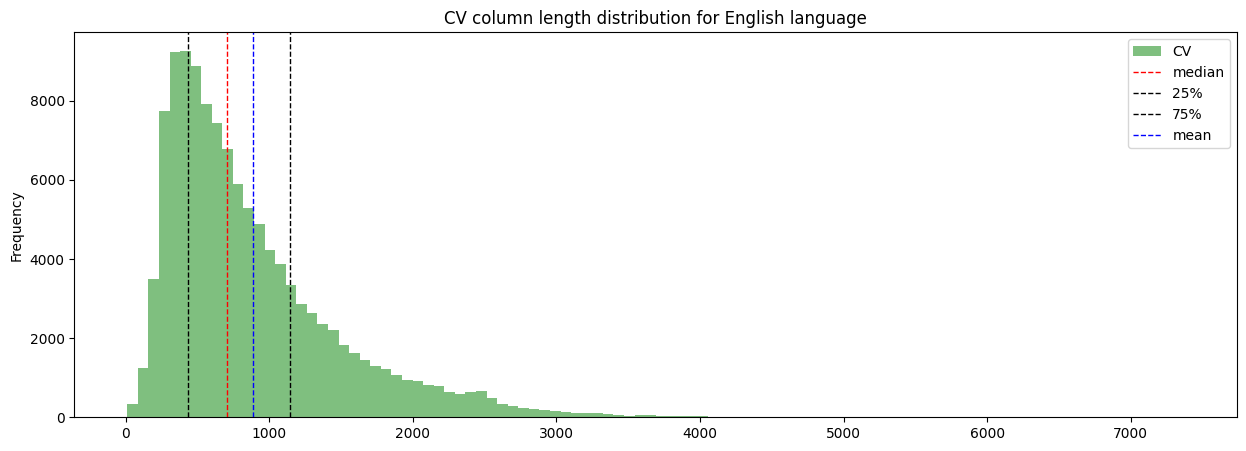

In [40]:
# distribution of CV column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'CV', 'CV column length distribution for English language')

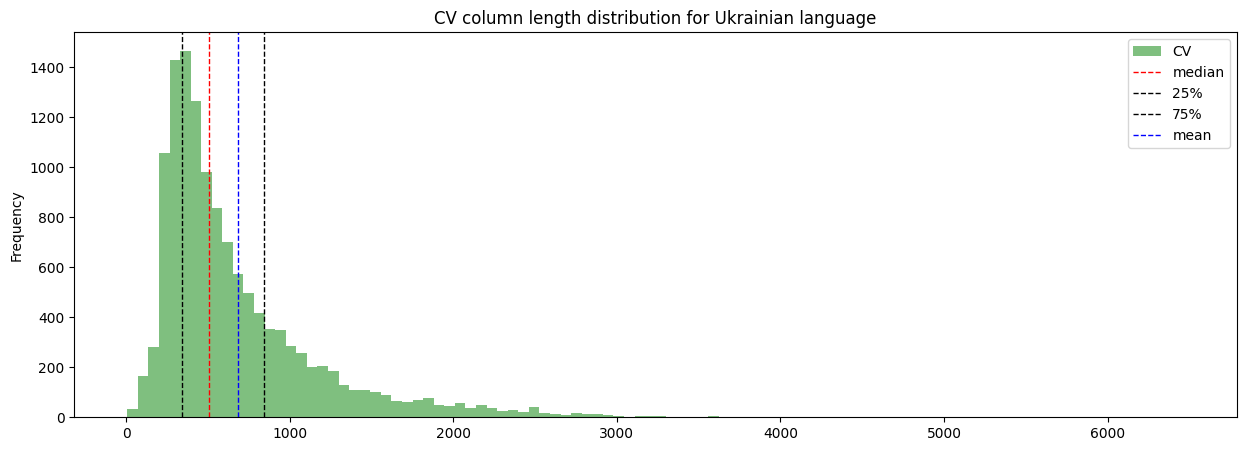

In [41]:
# distribution of CV column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'CV', 'CV column length distribution for Ukrainian language')

### CV_lang column
`syntetic created column from CV column for language detection`

<Axes: title={'center': 'CV_lang column value counts'}, ylabel='count'>

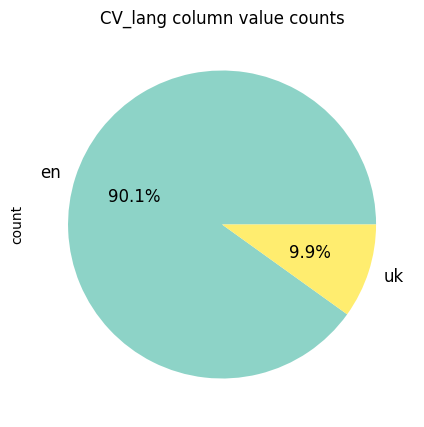

In [42]:
# CV_lang column value counts as a pie chart
df['CV_lang'].value_counts().plot(kind='pie', figsize=(5,5), title='CV_lang column value counts', fontsize=12, autopct='%1.1f%%', colormap='Set3')

### id column
`synthetic created column for identifcation each candidate`

## Morphological analysis of CVs(Ukrainian language for detecting gender features)

In [43]:
morph = pymorphy3.MorphAnalyzer(lang='uk')
morph.parse("працювала")[0].tag.gender

'femn'

In [44]:
morph.parse("працювала")[0].tag.POS

'VERB'

In [45]:
# detect percantage where we have feminitive in Ukrainian CVs

morph = pymorphy3.MorphAnalyzer(lang='uk')

def detect_feminitive(text):
    words = tokenize_uk.tokenize_uk.tokenize_words(text)
    verbs = [morph.parse(word)[0].word for word in words if morph.parse(word)[0].tag.POS == 'VERB']
    femn_verb_len = len([morph.parse(word)[0].tag.gender for word in verbs if morph.parse(word)[0].tag.gender == 'femn'])
    if femn_verb_len == 0 or len(verbs) == 0:
        return 0
    
    gender = femn_verb_len/len(verbs)
    return 1 if gender > 0.5 else 0

count = 0
ukr_cv = df[df['CV_lang'] == 'uk']['CV'].values
for cv_text in tqdm(ukr_cv):
    count+=detect_feminitive(cv_text)
print("Percentage of feminitive in Ukrainian CVs:", count/len(ukr_cv))

100%|██████████| 12915/12915 [00:52<00:00, 243.85it/s]

Percentage of feminitive in Ukrainian CVs: 0.05489740611691831


## Protected groups detect by languages(other than gender)

In [55]:
def protected_groups_uk(values:list[str]):
    marital_count = 0
    military_count = 0
    religion_count = 0
    age_count = 0
    marital_detect_exp = []
    military_detect_exp = []
    religion_detect_exp = []
    age_detect_exp = []
    for val in values:
        if re.search(r'сімейний статус', val) or re.search(r'заміжн', val) or re.search(r'одружен', val):
            marital_count+=1
            marital_detect_exp.append(val)
        if re.search(r'військов', val) or re.search(r'військ', val):
            military_count+=1
            military_detect_exp.append(val)
        if re.search(r'релігія', val):
            religion_count+=1
            religion_detect_exp.append(val)
        if re.search(r'мені \d{1,3} років', val.lower()):
            age_count+=1
            age_detect_exp.append(val)

    print("Marital status count:", marital_count)
    print("Marital status:", marital_count/len(values))
    print("EXAMPLES:")
    for exp in marital_detect_exp[:5]:
        print(exp)
        print()
    print("\nMilitary status count:", military_count)
    print("Military status:", military_count/len(values))
    print("EXAMPLES:")
    for exp in military_detect_exp[:5]:
        print(exp)
        print()
    print("\nReligion status count:", religion_count)
    print("Religion status:", religion_count/len(values))
    print("EXAMPLES:")
    for exp in religion_detect_exp[:5]:
        print(exp)
        print()
    print("\nAge status count:", age_count)
    print("Age status:", age_count/len(values))
    print("EXAMPLES:")
    for exp in age_detect_exp[:5]:
        print(exp)
        print()
        
    
def protected_groups_en(values:list[str]):
    marital_count = 0
    military_count = 0
    religion_count = 0
    age_count = 0
    marital_detect_exp = []
    military_detect_exp = []
    religion_detect_exp = []
    age_detect_exp = []
    for val in values:
        if re.search(r'marital status', val) or re.search(r'married', val):
            marital_count+=1
            marital_detect_exp.append(val)
        if re.search(r'military', val):
            military_count+=1
            military_detect_exp.append(val)
        if re.search(r'religion', val):
            religion_count+=1
            religion_detect_exp.append(val)
        if re.search(r'I am \d{1,3} years', val):
            age_count+=1
            age_detect_exp.append(val)

    print("Marital status count:", marital_count)
    print("Marital status:", marital_count/len(values))
    print("EXAMPLES:")
    for exp in marital_detect_exp[:5]:
        print(exp)
        print()
    print("\nMilitary status count:", military_count)
    print("Military status:", military_count/len(values))
    print("EXAMPLES:")
    for exp in military_detect_exp[:5]:
        print(exp)
        print()
    print("\nReligion status count:", religion_count)
    print("Religion status:", religion_count/len(values))
    print("EXAMPLES:")
    for exp in religion_detect_exp[:5]:
        print(exp)
        print()
    print("\nAge status count:", age_count)
    print("Age status:", age_count/len(values))
    print("EXAMPLES:")
    for exp in age_detect_exp[:5]:
        print(exp)
        print()

print("Ukrainian CVs:")
protected_groups_uk(df[df['CV_lang'] == 'uk']['CV'].values)
print("English CVs:")
protected_groups_en(df[df['CV_lang'] == 'en']['CV'].values)

Ukrainian CVs:
Marital status count: 5
Marital status: 0.00038714672861014324
EXAMPLES:

Привіт, мене звати Дмитро, мені 26 років, я одружений, маю прекрасну доньку. У мене є робота на повний робочий день, але в пошуках альтернативи, тому що я вважаю, що мої амбіції виросли вище, ніж може дати компанія в якій я зараз працюю. Я людина, націлена на результат. Я прийшов у цю компанію 6 років тому і пройшов шлях від моушн-дизайнера до менеджера з продажів, від менеджера з продажів до керівника відділу продажів і від керівника відділу продажів до COO. Компанія, в якій я зараз працюю, спеціалізується на створенні відео, розробці логотипів, анімації логотипів, створенні промо та рекламних роликів, тому цю кухню я знаю від а до я. Зв'яжіться зі мною, якщо вам цікаві мої навички та досвід.



Досвід роботи:

2012 р. - 2016 р. — помічниця головного редактора сатиричного онлайн-видання фейкових новин UaReview.com. Допомога в роботі із соцмережами, копірайтинг, редагування;

серпень 2016 р. - 14 ч

From analyses we found that we need to filter out items with sensative information: 
- by marital status
- by age
- by religion

For military status we can't filter out because it's looks like it is false position items and it isn't related to military status.

In [57]:
# check if we have phone number in CV
def detect_phone(text):
    if re.search(r'\+380\d{9}', text):
        return 1
    return 0

count = 0
for cv_text in tqdm(df['CV'].values):
    count+=detect_phone(cv_text)
print("Count of CVs with phone number in CVs:", count)
print("Percentage of CVs with phone number in CVs:", count/len(ukr_cv))

100%|██████████| 130312/130312 [00:00<00:00, 855740.25it/s]

Count of CVs with phone number in CVs: 16
Percentage of CVs with phone number in CVs: 0.0012388695315524584


In [58]:
def detect_email(text):
    if re.search(r'[\w\.-]+@[\w\.-]+', text):
        return 1
    return 0

count = 0
for cv_text in tqdm(df['CV'].values):
    count+=detect_email(cv_text)
print("Count of CVs with email in CVs:", count)
print("Percentage of CVs with email in CVs:", count/len(ukr_cv))

100%|██████████| 130312/130312 [00:08<00:00, 15704.44it/s]

Count of CVs with email in CVs: 0
Percentage of CVs with email in CVs: 0.0


We need to drop information with phone numbers and emails too.

## Manual check of data sample(10 samples English language)

In [47]:
for text in df[df['CV_lang']=='en'].sample(10)['CV']:
    print(text)
    print('-'*100, '\n\n')


I  am  an  email  marketer  with  knowledge  of  email  marketing  strategies
and  processes.  I  have  practical  experience  with  SendPulse  and  CANVA
tools for creating and launching email campaigns.
I'm a fast learner and am fully immersed in the process in a short period
of  time.  I  enjoy  working  in  a  team  and  am  always  open  to  new
knowledge.

---------------------------------------------------------------------------------------------------- 


- Did a basic AWS Lambda + Golang project
- Built a RESTful API with Golang
- Did some commercial freelance projects with the use of PostgreSQL, and some basic personal projects with MongoDB.
- Have a lot of server Golang personal projects
- Made fullstack web applications with React + Node.js + PostgreSQL stack
Frontend Freelancer (February 2021 - October 2022)
Made simple websites using React, Redux, Apollo and practiced Node.js, and PostgreSQL, MongoDB.

Since October, took a break from freelancing, and decided to switch 

## Manual check of data sample(10 samples Ukrainian language)

In [48]:
for text in df[df['CV_lang']=='uk'].sample(10)['CV']:
    print(text)
    print('-'*100, '\n\n')

09.2022 - закінчила курс "Фундамент HR" від peoplefirst.club.
Вмію на базовому рівні користуватися Boolean search та X-Ray Search. 
Вмію використовувати ресурси для пошуку кандидатів (Linkedin, Djinni, DOU, GitHub та інші).
Володію англійською мовою на рівні В1.
Прагну працювати на результат, покращувати свої hard- та soft- skills та розвиватися разом із командою.

---------------------------------------------------------------------------------------------------- 


Розпочинав свою кар'єру з Python розробника, з часом пізнав Go. 
В продовж 2 років розробляю на Go, спочатку пробні тестові проєкти, а потім 
Зрозумів принцип роботи з інтерфейсами. Навчився працювати з горутинами та їх синхронізувати. Прийшов до ідеальної, на мою думку, архітектури проекту. Навчився писати юніт тести, розгортати систему з дроплетів за допомогою terraform.
Golang
Сервіс API авторизації, отримання привілей та конфігурацій оператора(касира). 
Стек: Go, PostgreSQL, Redis, Docker

Сервіс АРІ продож квитків та 